In [ ]:
# Инструменты для оперативной работы с данными

In [6]:
import os
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
DATA_PATH = os.path.join('names')

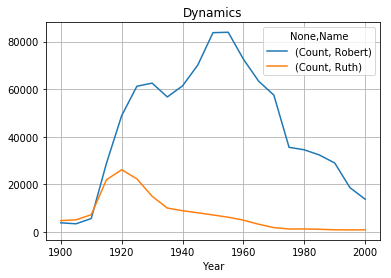

In [21]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv((os.path.join(DATA_PATH, f'yob{year}.txt')),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(title='Dynamics', grid=True)

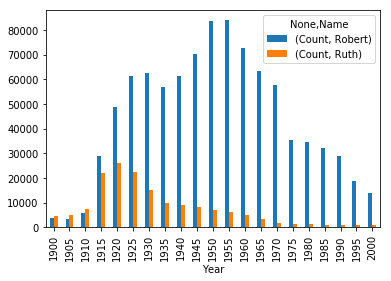

In [22]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

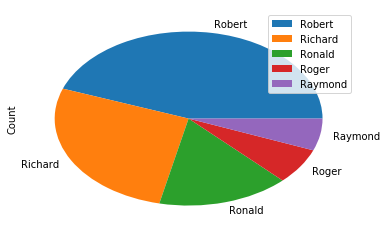

In [30]:
names = pd.read_csv(
    (os.path.join(DATA_PATH, f'yob1950.txt')), 
    names=['Name','Gender','Count']
)
top_1950 = names[names.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count', ascending=False).head(5)
top_1950.plot.pie(y='Count')